# Gram Matrix
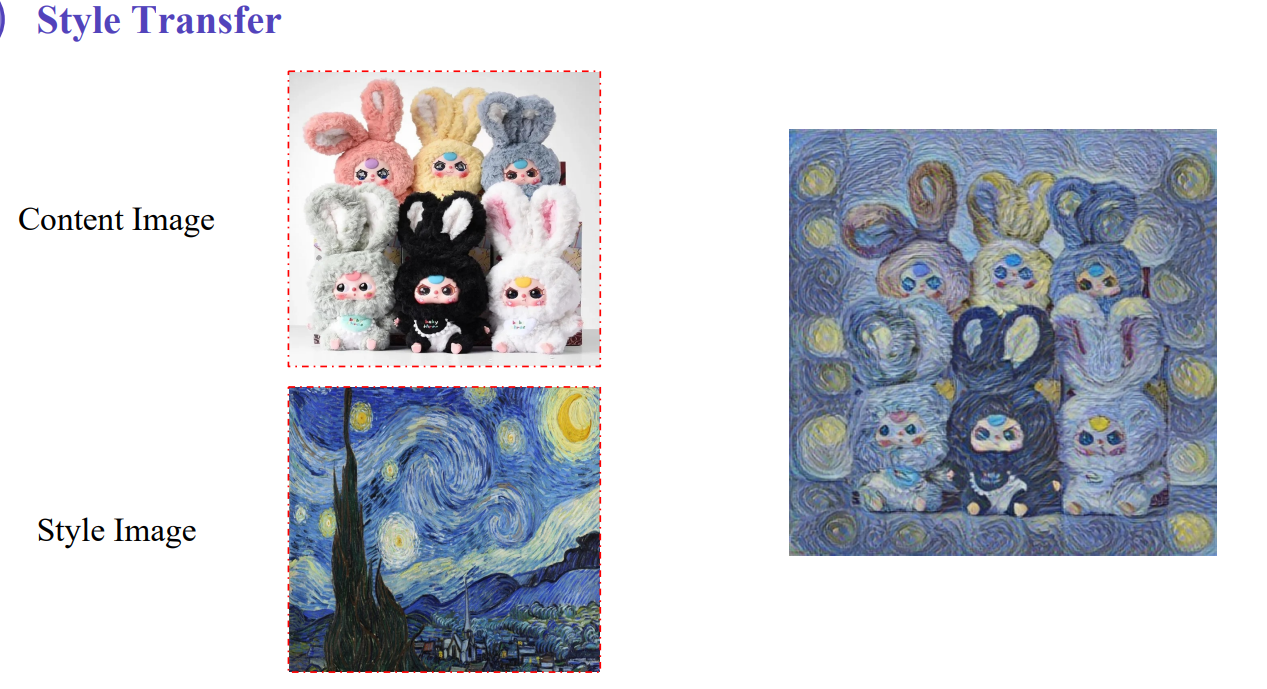
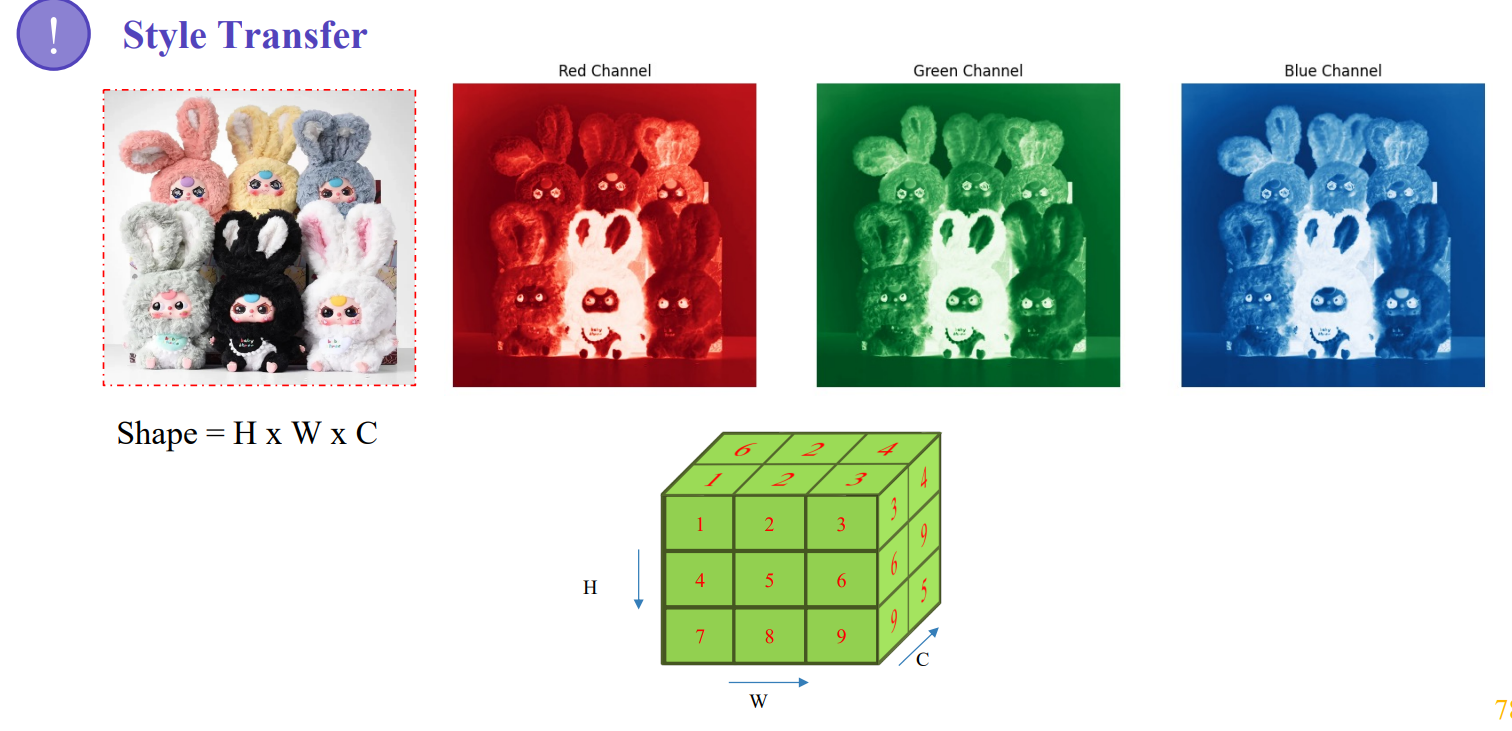

In [1]:
%pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


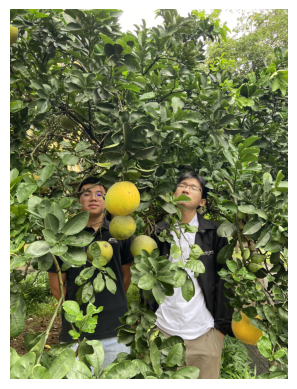

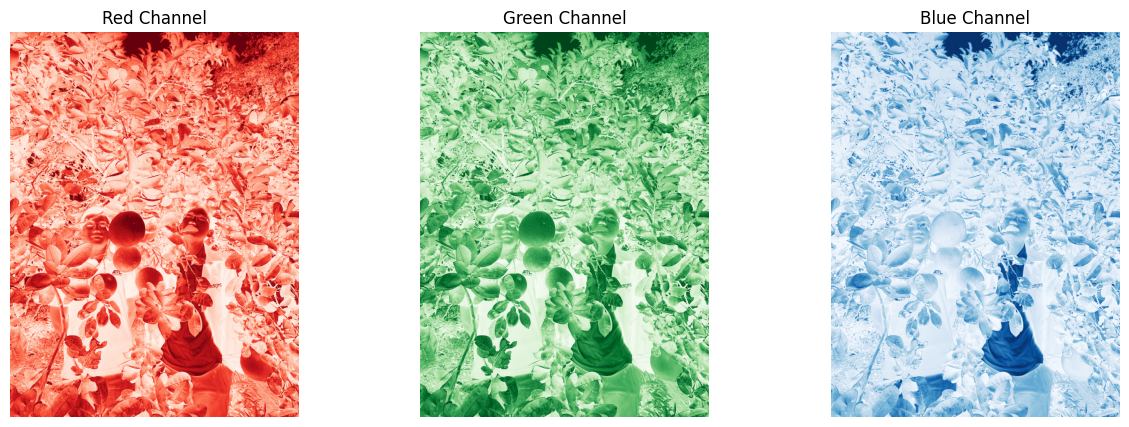

In [11]:
# Đọc ảnh
image = cv2.imread(r'.\img\nan.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(image)
plt.axis('off')
plt.show()

# Tách các kênh màu
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

# Tạo subplot để hiển thị 3 kênh màu
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

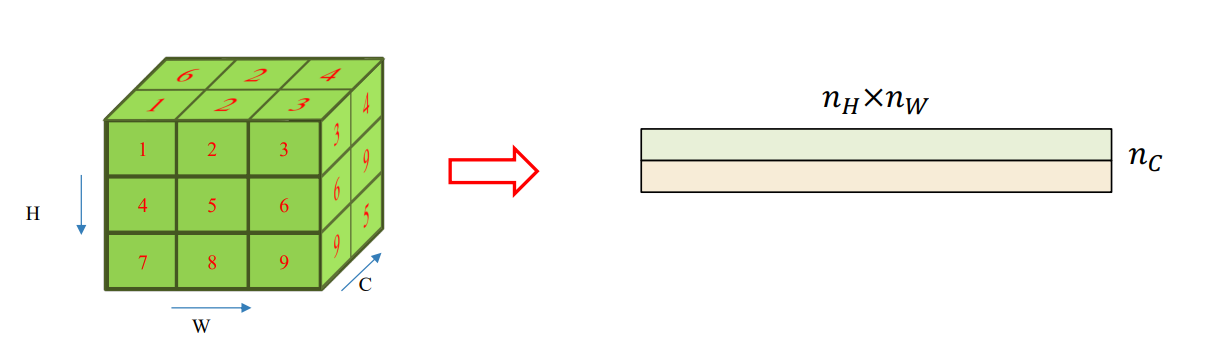
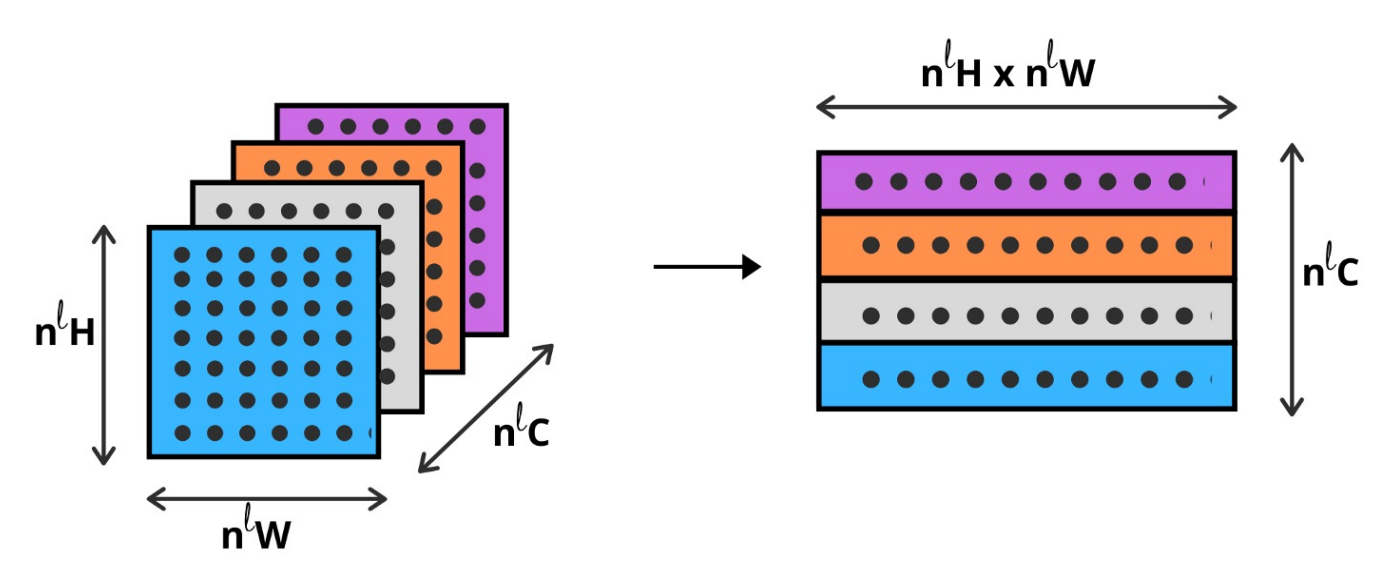
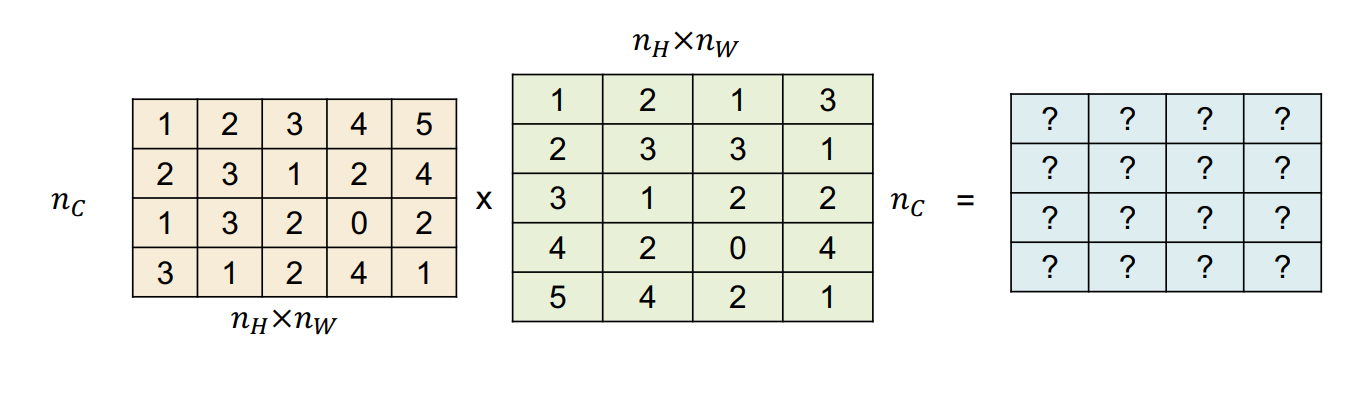
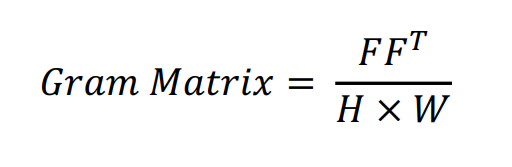
- Công thức Gram Matrix chỉ = F@F.t phần chia cho H * W để normalize
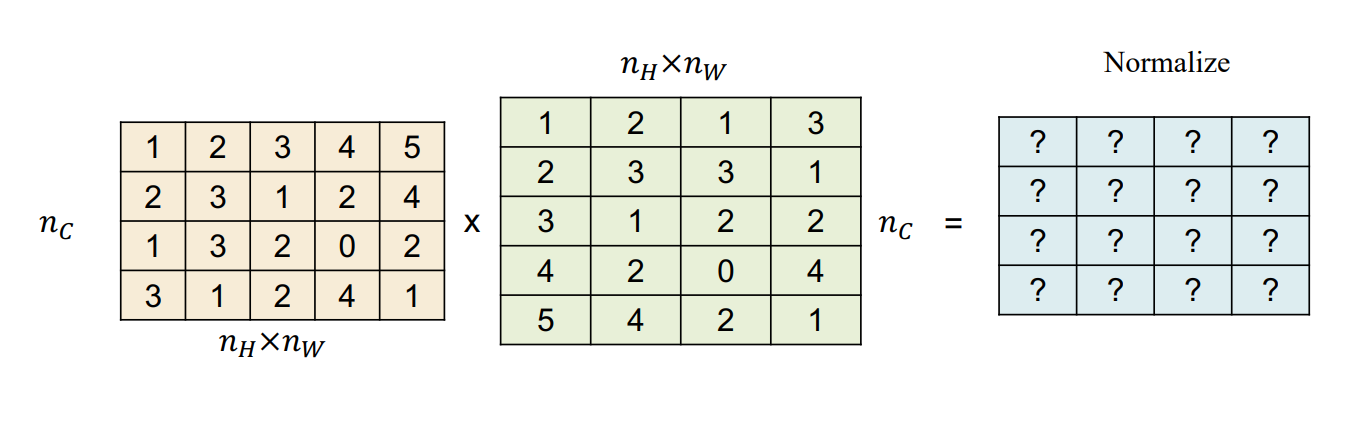

In [14]:
def compute_gram_matrix(feature_map: np.ndarray) -> np.ndarray:
    """
    Tính Gram Matrix từ feature map.

    Args:
        feature_map (np.ndarray): Ma trận đặc trưng có kích thước (C, H, W).

    Returns:
        np.ndarray: Gram Matrix có kích thước (C, C)
    """
    # Lấy kích thước đầu vào
    C, H, W = feature_map.shape

    # Chuyển đổi ma trận về dạng (C, H*W)
    F = feature_map.reshape(C, H*W).astype(np.float64)

    # Tính Gram Matrix G = F @ F.T
    G = np.dot(F, F.T) # hoặc np.matmul(F, F.T)

    # Chuẩn hóa bằng số điểm ảnh để tránh giá trị quá lớn
    G /= (H*W)

    return G



In [15]:
feature_map = np.array([
    [[1, 2, 3, 4, 5]],
    [[2, 3, 1, 2, 4]],
    [[1, 3, 2, 0, 2]],
    [[3, 1, 2, 4, 1]]
])

gram_matrix = compute_gram_matrix(feature_map)
print(gram_matrix)
print(feature_map.shape)

[[11.   7.8  4.6  6.4]
 [ 7.8  6.8  4.2  4.6]
 [ 4.6  4.2  3.6  2.4]
 [ 6.4  4.6  2.4  6.2]]
(4, 1, 5)
